In [1]:
import os
import human_characterisation_functions as hcf
import pandas as pd
import glob
import sorting_functions as sort
import funcs_for_results_tables as get_results
import numpy as np
import detect_peaks as peaks
import matplotlib.pyplot as plt

human_dir = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/data/human/'
#results_dir = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/results/human/data/'
exp_view = pd.read_excel(glob.glob(human_dir + '*experiments_overview.xlsx')[0]) 
exp_view_new = sort.update_op_list(human_dir, exp_view)
sort.add_cortex_out_time(human_dir, exp_view_new)

/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/code/Human-slice-scripts/detect_peaks.py:11: UserWarning: A newest version is available at https://pypi.org/project/detecta/
  warnings.warn('A newest version is available at https://pypi.org/project/detecta/')


# High K condition analysis

In [2]:

OP = 'OP230330'
patcher = 'Verji'
tissue_source = 'Hamburg'
inj = 'full'
age = 35

# # the times at which a change in recording solution
# change_times_dict = {
#     'S1' : ['2023-01-27 20:10:00', 'wash in high K'],
#     'S2' : ['2023-01-27 23:20:00', 'wash out high K']
#     # 'S3' : ['2022-06-16 13:34:00', 'wash in TTX'],
#     # 'S4' : ['2022-06-16 15:32:00', 'wash in TTX'],
#     # 'S5' : ['2022-06-17 09:39:00', 'wash in high K'],
#     # 'S6' : ['2022-06-17 11:40:00', 'wash out high K'],
#     # 'S7' : ['2022-06-17 14:00:00', 'nothing'],
#     # 'S8' : ['2022-06-17 15:30:00', 'wash out high K']
# }

In [5]:
OP = 'OP230914'
patcher = 'Verji'
tissue_source = 'Bielefeld'
inj = 'full'
age = 13

work_dir, filenames, indices_dict, slice_names = sort.get_OP_metadata(human_dir, OP, patcher)


In [21]:
work_dir, filenames, indices_dict, slice_names = sort.get_OP_metadata(human_dir, OP, patcher)

file_list = sort.get_sorted_file_list(work_dir)
jsons = sort.get_json_files(file_list)
if OP + '_indices_dict.json' in jsons:
    indices_dict = sort.from_json(work_dir, OP, '_indices_dict.json')
else: 
    sort.to_json(work_dir, OP, '_indices_dict.json', indices_dict)

slice_names = np.array(slice_names)


In [26]:
df = pd.read_excel('/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/data/human/data_verji/OP230914/lab_book_OP230914.xlsx',
header = 1)
df['condition'].dropna().unique()
#print(len(indices_dict['resting_long']))

array(['Ctrl temp', 'high K temp', 'high K RT', 'Ctrl RT'], dtype=object)

In [27]:
filenames[4][:-4]

'23914005'

In [29]:
#creating a filename dictionary with conditions
exp_condition = df['condition'].dropna().tolist()
conditions_dict = {}

for i, rest_indx in enumerate(indices_dict['resting_long']):
    conditions_dict[filenames[rest_indx][:-4]] = [slice_names[rest_indx], exp_condition[i]]

In [30]:
  conditions_dict


{'23914004': ['S1', 'Ctrl temp'],
 '23914005': ['S1', 'high K temp'],
 '23914008': ['S1', 'high K temp'],
 '23914009': ['S1', 'Ctrl temp'],
 '23914012': ['S2', 'high K RT'],
 '23914013': ['S2', 'high K temp'],
 '23914014': ['S2', 'Ctrl temp'],
 '23914015': ['S2', 'Ctrl RT'],
 '23914018': ['S2', 'Ctrl RT'],
 '23914019': ['S2', 'Ctrl temp'],
 '23914020': ['S3', 'high K temp'],
 '23914021': ['S3', 'high K RT'],
 '23914025': ['S3', 'high K RT'],
 '23914026': ['S3', 'high K temp'],
 '23914027': ['S3', 'Ctrl temp'],
 '23914028': ['S3', 'Ctrl RT']}

In [308]:
# channel_list = [ch + ' ' + k for ch in ['Ch' + str(i) for i in range(1,9)] for k in ['before', 'after']]
# RMP_all = pd.DataFrame(columns = ['slice', 'channel/condition', 'resting_potential', 'num_peaks', 'exp_condition'])

# for slic in np.unique(slice_names):
#     change_time = sort.get_datetime_from_input(change_times_dict[slic][0])

#     first_for_slice = np.where(slice_names == slic)[0][0]
#     last_for_slice = np.where(slice_names == slic)[0][-1]
#     true_indices = (first_for_slice <= indices_dict['vm_mouse_long']) & (indices_dict['vm_mouse_long'] <= last_for_slice)

#     vm_files = np.array(indices_dict['vm_mouse_long'])
#     vm_long_all_dict = dict(zip(channel_list, [np.empty(0)]*len(channel_list)))

#     for indx in vm_files[true_indices]: #change here
#         fn1 = work_dir + filenames[indx]
#         rec_time = hcf.get_recording_time(fn1)
#         if rec_time < change_time:
#             condition = ' before'
#         else: 
#             condition = ' after'
#         vm_long = hcf.load_traces(fn1)
#         for ch in vm_long.keys(): # change here
            
#             vm_long_flat = np.reshape(vm_long[ch][0], -1)
#             if np.mean(vm_long_flat[0:500]) < -90 or np.mean(vm_long_flat[0:500]) > -35:
#                 continue
#             vm_long_all_dict[ch + condition] = np.concatenate((vm_long_all_dict[ch + condition], vm_long_flat))
    
#     for chan in channel_list:
#         if len(vm_long_all_dict[chan]) == 0:
#             del vm_long_all_dict[chan]

#     keys_dict = list(vm_long_all_dict.keys())
#     #delete if there is no signal before and after
#     to_del = []
#     for i in range(1,len(keys_dict)-1):
#         if keys_dict[i][:3] != keys_dict[i-1][:3] and keys_dict[i][:3] != keys_dict[i+1][:3]:
#             to_del.append(i)
#     if keys_dict[i+1][:3] != keys_dict[i][:3]:
#         to_del.append(i)
#     to_del = sorted(to_del, reverse=True)
#     for d in np.unique(to_del):
#         chan = keys_dict[d]
#         del vm_long_all_dict[chan]

#     keys_ = list(vm_long_all_dict.keys())
#     peaks_dict = dict(zip(keys_, [np.empty(0)]*len(keys_)))
#     RMPs = dict(zip(keys_, [np.empty(0)]*len(keys_)))

#     #fig, axs = plt.subplots(len(vm_long_all_dict), 1,figsize=(20, 8), sharex = True)

#     for i, chan in enumerate(vm_long_all_dict.keys()):
#         peaks1 = peaks.detect_peaks(vm_long_all_dict[chan], mph = 10, mpd = 10, 
#         edge='rising',kpsh=True, show=False, title = chan)
#     #peaks1 = peaks.detect_peaks(vm_long_all_dict[chan], mph = 10, mpd = 10, 
#         #edge='rising',kpsh=True, ax = axs[i], show=True, title = chan)
#         peaks_dict[chan] = np.concatenate((peaks_dict[chan], peaks1))
#         if 'before' in chan:
#             RMPs[chan] = np.mean(vm_long_all_dict[chan][:1000])
#         else: 
#             RMPs[chan] = np.mean(vm_long_all_dict[chan][-1000:])
#     num_peaks = []
#     for chan in peaks_dict.keys():
#         num_peaks.append(len(peaks_dict[chan]))
#     #fix to add slice name
#     RMP_df = pd.DataFrame({'slice': slic, 'channel/condition': RMPs.keys(), 
#     'resting_potential' : RMPs.values(), 'num_peaks': num_peaks, 'exp_condition': change_times_dict[slic][1]})
#     RMP_all = pd.concat([RMP_all.loc[:], RMP_df]).reset_index(drop=True)

# RMP_all.to_excel(work_dir + '/data_tables/' + OP + '_RMPs.xlsx', index=False)
        

In [356]:
#when conditons change many times, do analysis based on filename

RMP_all = pd.DataFrame(columns = ['fn', 'slice', 'channel', 'resting_potential', 'num_peaks', 'exp_condition'])

for indx in indices_dict['resting_long']: 
    slic = slice_names[indx]
    fn1 = work_dir + filenames[indx]
    rec_time = hcf.get_recording_time(fn1)

    vm_long = hcf.load_traces(fn1)
    for ch in vm_long.keys(): 
        
        vm_long_flat = np.reshape(vm_long[ch][0], -1)
        if np.mean(vm_long_flat[0:500]) < -90 or np.mean(vm_long_flat[0:500]) > -35:
            continue
        peaks1 = peaks.detect_peaks(vm_long_flat, mph = 10, mpd = 10, 
        edge='rising',kpsh=True, show=False, title = chan)
        num_peaks = len(peaks1)
        RMP = np.mean(vm_long_flat[:500])
        
        RMP_df = pd.DataFrame({'fn': filenames[indx], 'slice': slic, 'resting_potential' : RMP, 
        'channel': ch,'num_peaks': num_peaks}, index=[0])
        RMP_all = pd.concat([RMP_all.loc[:], RMP_df]).reset_index(drop=True)

RMP_all.to_excel(work_dir + '/data_tables/' + OP + '_RMPs.xlsx', index=False)
    

OSError: Cannot save file into a non-existent directory: '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/data/human/data_verji/OP230126/data_tables'

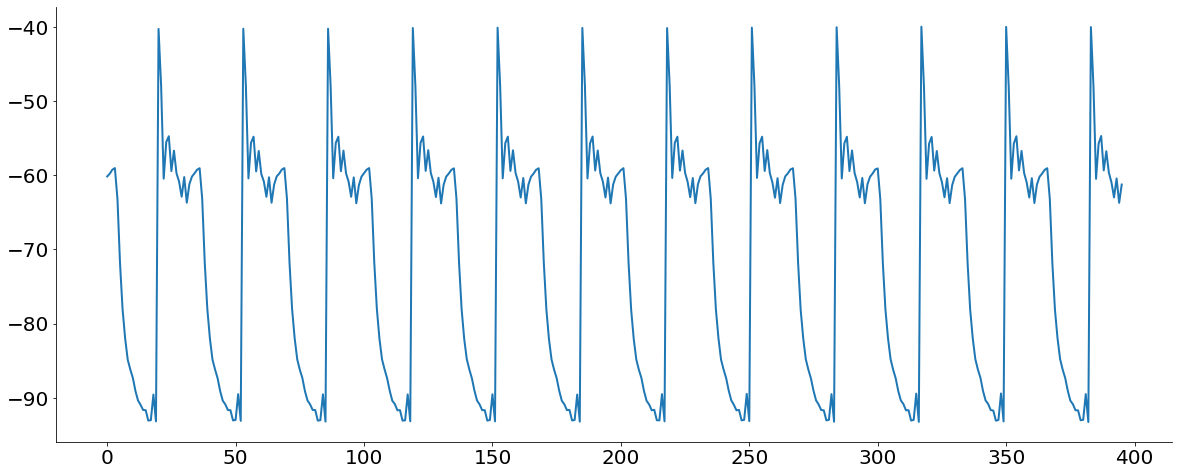

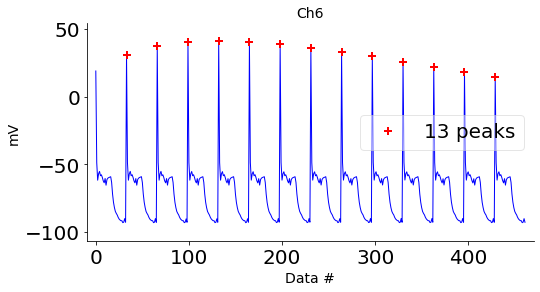

In [370]:
# plotting funcs not finished 
chan = 'Ch6'

fn1 = work_dir + '23127033.abf'
rec_time = hcf.get_recording_time(fn1)

vm_long = hcf.load_traces(fn1)
vm_long_flat = np.reshape(vm_long[chan][0], -1)

fig, axs = plt.subplots(1, 1,figsize=(20, 8), sharex = True)

peaks1 = peaks.detect_peaks(vm_long_flat[294149:294611], mph = 10, mpd = 10, 
       edge='rising',kpsh=True, show=True, title = chan)
# y = np.concatenate((vm_long_all_dict[chan + ' before'], vm_long_all_dict[chan + ' after']))
# x = np.linspace(0,len(y),len(y))  # /20_000

# part1 = 4143290
# part2 = 4149600
#axs.plot(x[part1:part2],y[part1:part2])
axs.plot(vm_long_flat[peaks1[0]:peaks1[-1]])
#axs.plot(x,y)
#axs.vlines(x[len(vm_long_all_dict['Ch5 before'])], -80, 20, colors = 'red', alpha = 0.7)

In [51]:
def get_RMP_per_sweep (fn, active_chans):
    ''' 
    fn - filename with path; chans is - list of active channels
    for long RMP traces, returns a dataframe with fn, channel, sweep
    and RMP
    '''
    fn_data = hcf.load_traces(fn)
    chans, swps, RMPs = [], [], []
    for chan in active_chans:
        chan_data = fn_data['Ch' + str(chan)][0]
        num_swps = np.shape(chan_data)[1]
        for swp in range(num_swps):
            chans.append(chan)
            swps.append(swp)
            RMPs.append(np.median(chan_data[100:1100,swp]))

    RMP_df = pd.DataFrame({'filename':fn[-12], 'channel':chans, 'sweep_num':swps, 'resting_potential':RMPs}) 
    return RMP_df  

fn = '/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/data/human/data_verji/OP230914/23914004.abf'
chans = [2,3,4]  
df_RMP = get_RMP_per_sweep (fn, chans)

#df_RMP = pd.DataFrame(columns = {'OP','exp_condition','filename', 'channel', 'sweep_num','resting_potential'})


In [56]:
df_RMP.insert([0, 'OP', OP)

'23914004.abf'

In [53]:
df_RMP

,OP,filename,channel,sweep_num,resting_potential
0,OP230914,/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/...,2,0,-70.312500
1,OP230914,/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/...,2,1,-70.178223
2,OP230914,/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/...,2,2,-71.105957
3,OP230914,/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/...,2,3,-71.697998
4,OP230914,/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/...,2,4,-71.691895
...,...,...,...,...,...
130,OP230914,/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/...,4,40,-69.708252
131,OP230914,/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/...,4,41,-69.494629
132,OP230914,/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/...,4,42,-69.714355
133,OP230914,/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/...,4,43,-69.616699


# Analysis of TTX washout

In [5]:
OP = 'OP230420'
patcher = 'Verji'
tissue_source = 'Bielefeld'
inj = 'full'
age = '13'

In [6]:
work_dir, filenames, indices_dict, slice_names = sort.get_OP_metadata(human_dir, OP, patcher)

file_list = sort.get_sorted_file_list(work_dir)
jsons = sort.get_json_files(file_list)
if OP + '_indices_dict.json' in jsons:
    indices_dict = sort.from_json(work_dir, OP, '_indices_dict.json')
else: 
    sort.to_json(work_dir, OP, '_indices_dict.json', indices_dict)

slice_names = np.array(slice_names)

In [7]:
df_OP = pd.DataFrame(columns=['filename', 'slice', 'cell_ch', 'cell_ID','resting_potential', 
'max_spikes', 'Rheobase', 'AP_heigth', 'TH', 'max_depol', 'max_repol', 'membra_time_constant_tau', 'capacitance'])

slic = 'S3'

first_for_slice = np.where(slice_names == slic)[0][0]
last_for_slice = np.where(slice_names == slic)[0][-1]
true_indices = (first_for_slice <= indices_dict['freq analyse']) & (indices_dict['freq analyse'] <= last_for_slice)

char_files = np.array(indices_dict['freq analyse'])

for char in char_files[true_indices]:
    #char = indices_dict['freq analyse'][indx]
    filename_char = work_dir + filenames[char]

    active_channels = [1, 2, 3, 4, 5, 6, 8]
    cell_IDs = hcf.get_cell_IDs(filename_char, slic, active_channels)

    charact_dict = hcf.load_traces(filename_char)
    RMPs = []
    for chan in active_channels:
        ch1 = charact_dict['Ch' + str(chan)][0]
        RMPs.append(np.median(ch1[:,5]))

    params1_df = pd.DataFrame({'filename': filenames[char], 'slice' : slic, 'cell_ch': active_channels,
        'cell_ID':cell_IDs, 'resting_potential': RMPs })

    tau_all, capacitance_all, mc_all, V65_all, RMPs_char = get_hyperpolar_param(charact_data, channels, inj, onset = 2624, offset = 22624, mc = np.ndarray([5,3])):


    charact_params  = hcf.all_chracterization_params(filename_char, active_channels, inj)
    df_char = pd.DataFrame.from_dict(charact_params)

    df_to_add = pd.concat([params1_df, df_char], axis = 1)
    df_OP = pd.concat([df_OP.loc[:], df_to_add]).reset_index(drop=True)

df_OP.to_excel(work_dir + 'data_tables/' + OP + '_TTX_washout_experiments.xlsx', index=False) 


MAX number of AP = 1 for Ch1
MAX number of AP = 1 for Ch1
MAX number of AP = 1 for Ch1
MAX number of AP = 1 for Ch1
Only 1 SLOW AP found for Ch3
MAX number of AP = 1 for Ch5
MAX number of AP = 1 for Ch6
MAX number of AP = 1 for Ch2
Only 1 SLOW AP found for Ch3


{'max_spikes': [20, 23, 2271, 12, 15, 17, 13],
 'Rheobase': [400, 450, 600, 550, 350, 250, nan],
 'AP_heigth': [36.248779296875,
  35.0341796875,
  nan,
  46.0205078125,
  43.377685546875,
  39.4287109375,
  nan],
 'TH': [-8.94775390625,
  -14.788818359375,
  nan,
  -19.073486328125,
  -21.0693359375,
  -17.266845703125,
  nan],
 'max_depol': [47.36328125,
  56.884765625,
  nan,
  134.6435546875,
  109.9853515625,
  74.0966796875,
  nan],
 'max_repol': [-22.705078125,
  -20.01953125,
  nan,
  -43.212890625,
  -30.1513671875,
  -19.775390625,
  nan],
 'membra_time_constant_tau': [18.5,
  21.450000000000003,
  1.3,
  17.7,
  22.8,
  24.3,
  23.150000000000002],
 'capacitance': [362.131421744325,
  426.24232868405096,
  10.806291222729582,
  496.56986301369864,
  498.7385847797063,
  399.93088900050236,
  466.8179692307693]}